<a href="https://colab.research.google.com/github/anibahs/DSEM_INFO6105/blob/main/ML%20Data%20Cleaning%20Feature%20Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Abstract**


The aim of the dataset is to predict the variable RainTomorrow, using Logistic Regression in Assignment, but on training using RFE found that it performed better. To improve performance, we analyze the data using univariate, bivariate and mutivariate visualizations, complete data preprocessing and feature selection. 

# **Dataset**


The dataset includes observations of the climate in Australia of a period of 10 years and how the rainfall varies depending on other climate changes.

* Target Variable: 
  * RainTomorrow : The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk".
* Independant Variables:
  * Date : date of observation
  * Location : region within Australia
  * MinTemp : Minimum temperature in teh day in degree Celsius
  * MaxTemp : Maximum temperature in teh day in degree Celsius
  * Rainfall : The amount of rainfall recorded for the day in mm
  * Evaporation : The so-called Class A pan evaporation (mm) in the 24 hours to 9am
  * Sunshine : The number of hours of bright sunshine in the day.
  * WindGustDir : The direction of the strongest wind gust in the 24 hours to midnight
  * WindGustSpeed : The speed (km/h) of the strongest wind gust in the 24 hours to midnight
  * WinDir9am : Direction of the wind at 9am
  * WinDir3pm : Direction of the wind at 3pm
  * WindSpeed9am : Wind speed (km/hr) averaged over 10 minutes prior to 9am
  * WindSpeed3pm : Wind speed (km/hr) averaged over 10 minutes prior to 3pm
  * Humidity9am : Humidity (percent) at 9am
  * Humidity3pm : Humidity (percent) at 3pm
  * Pressure9am : Atmospheric pressure (hpa) reduced to mean sea level at 9am
  * Pressure3pm : Atmospheric pressure (hpa) reduced to mean sea level at 3pm
  * Cloud9am : Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many
  * Cloud3pm : Fraction of sky obscured by cloud at 3pm. This is measured in "oktas", which are a unit of eigths. It records how many
  * Temp9am : Temperature (degrees C) at 3pm
  * Temp3pm : Temperature (degrees C) at 9am
  * RainToday : Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
* There are a total of 145460 observations.



[Dataset on Kaggle](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package)






### Important imports

In [ ]:
#handle data using data frames
import pandas as pd
from collections import Counter

# required for visualizations
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import skew

#data preprocessing 
from sklearn import preprocessing

# To calculate the score
from sklearn.metrics import accuracy_score 
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE # Recursive Feature Selection
from sklearn.metrics import confusion_matrix
from sklearn.impute import KNNImputer,SimpleImputer

# for outlier preprocessing 
!pip install datasist

import random, math
from sklearn.metrics import r2_score, mean_squared_error 

#import data from kaggle using kaggle library
!pip install eli5
!pip install -q kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Download API Key to download dataset from Kaggle

In [ ]:
#authentication to authenticate from Kaggle
import os

os.environ['KAGGLE_USERNAME'] = 'shabinasingh'
os.environ['KAGGLE_KEY'] = '4a64d2f32a2dec68f1b905c88bb66932'



In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
# list all datasets available on aKaggle
! kaggle datasets list


ref                                                             title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ahsan81/hotel-reservations-classification-dataset               Hotel Reservations Dataset                         480KB  2023-01-04 12:50:31           8209        287  1.0              
googleai/musiccaps                                              MusicCaps                                          793KB  2023-01-25 09:25:48           1429        155  0.9411765        
themrityunjaypathak/most-subscribed-1000-youtube-channels       Most Subscribed 1000 Youtube Channels               28KB  2023-01-21 14:42:05           1906         61  1.0              
nitishsharma01/olympics-124-years-datasettill-2020              O

### Download data set

In [ ]:
#download dataset using API from dataset
!kaggle datasets download -d jsphyg/weather-dataset-rattle-package


weather-dataset-rattle-package.zip: Skipping, found more recently modified local copy (use --force to force download)


### Decompress dataset to csv

In [ ]:
!unzip -o weather-dataset-rattle-package.zip -d /content

Archive:  weather-dataset-rattle-package.zip
  inflating: /content/weatherAUS.csv  


### Read CSV into dataframe using pandas library

In [ ]:
csv = '/content/weatherAUS.csv'
df = pd.read_csv(csv)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

A lot of the features have missing values

# What are the data types? 

In [ ]:
# Look at data types for each variable to find the numerical and categorical values
print(df.dtypes)

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object


### Finding more information on categorical features

We need to convert categorical data into numerical to be able to use it for Logistic Regression

In [ ]:
#look at categorical columns i.e. object type variables
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)


Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')


In [ ]:
# There are 7 variables, all except RainToday and RainTomorrow have a large number of unique values
# Data is exceptionally large and needs to be divided into Day, Month and Year to reduce number of unique values
df[categorical_columns].describe()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


In [ ]:
df[categorical_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Date          145460 non-null  object
 1   Location      145460 non-null  object
 2   WindGustDir   135134 non-null  object
 3   WindDir9am    134894 non-null  object
 4   WindDir3pm    141232 non-null  object
 5   RainToday     142199 non-null  object
 6   RainTomorrow  142193 non-null  object
dtypes: object(7)
memory usage: 7.8+ MB


We will impute missing values in categorical features using Mode value, before encoding them

In [ ]:
# Impute categorical var with Mode
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])


In [ ]:
df[categorical_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Date          145460 non-null  object
 1   Location      145460 non-null  object
 2   WindGustDir   145460 non-null  object
 3   WindDir9am    145460 non-null  object
 4   WindDir3pm    145460 non-null  object
 5   RainToday     145460 non-null  object
 6   RainTomorrow  142193 non-null  object
dtypes: object(7)
memory usage: 7.8+ MB


We need to convert Date into Year, Month and Date so that we can convert it into categorical column


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

data = df.drop('Date', axis=1)

data = data.dropna(axis=0, how='any', subset=["RainTomorrow"])

print(data.shape)

data.head(3)

(142193, 25)


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3


In [ ]:
categorical_features = ['Year', 'Month', 'Day', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday']

print(data.shape)

(142193, 25)


In [ ]:
print(len(pd.unique(data['Year'])))


11


In [ ]:
# Location has a huge number of unique values
data.Location.value_counts().sort_values(ascending=False).head(25)

Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Ballarat            3028
Launceston          3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Name: Location, dtype: int64

In [ ]:
# So we convert categorical features to continuous features with Label Encoding
from sklearn.preprocessing import LabelEncoder

lencoders = {}
features = ['Year', 'Month', 'Day', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow']
for col in data[features].columns:
    lencoders[col] = LabelEncoder()
    data[col] = lencoders[col].fit_transform(data[col])

<ipython-input-869-b2d4f753680b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = lencoders[col].fit_transform(data[col])


In [ ]:
data[categorical_features].head()

,Year,Month,Day,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,1,11,0,2,13,13,14,0
1,1,11,1,2,14,6,15,0
2,1,11,2,2,15,13,15,0
3,1,11,3,2,4,9,0,0
4,1,11,4,2,13,1,7,0


In [ ]:
encoded_data = data.copy()

In [ ]:
encoded_data.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month', 'Day'],
      dtype='object')

### Finding more information on numerical features

In [ ]:
numerical_columns = encoded_data.select_dtypes(include=['int','float','float64']).columns
print(numerical_columns)


Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month', 'Day'],
      dtype='object')


In [ ]:
# since the data is numerical we dont need to look at the type of data but it helps to look at hte distribution, how the values vary over the data
numerical_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm']
print(encoded_data[numerical_features].describe())

             MinTemp        MaxTemp       Rainfall   Evaporation  \
count  141556.000000  141871.000000  140787.000000  81350.000000   
mean       12.186400      23.226784       2.349974      5.469824   
std         6.403283       7.117618       8.465173      4.188537   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.800000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  74377.000000  132923.000000  140845.000000  139563.000000   
mean       7.624853      39.984292      14.001988      18.637576   
std        3.781525      13.588801       8.893337       8.803345   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.900000      31.000000       7.0000

# Are there missing values?

We have already imputed missing data for categorical features, so we will concentrate on numerical features now

In [ ]:
encoded_data[numerical_features].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
dtype: int64

In [ ]:
# find number and percentages of null values in each feature to figure out their proportions
total = encoded_data[numerical_features].isnull().sum().sort_values(ascending=False)
percent = (encoded_data[numerical_features].isnull().sum()/encoded_data[numerical_features].isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(21)

,Total,Percent
Sunshine,67816,0.476929
Evaporation,60843,0.427890
Cloud3pm,57094,0.401525
Cloud9am,53657,0.377353
Pressure9am,14014,0.098556
Pressure3pm,13981,0.098324
WindGustSpeed,9270,0.065193
Humidity3pm,3610,0.025388
Temp3pm,2726,0.019171
WindSpeed3pm,2630,0.018496


We need to impute these missing values using mean/median/mode or MICE/KNN

### Data Imputation

In [ ]:
# Multiple Imputation by Chained Equations
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputed_data = encoded_data.copy(deep=True) 
mice_imputer = IterativeImputer()
imputed_data.iloc[:, :] = mice_imputer.fit_transform(encoded_data)

/usr/local/lib/python3.8/dist-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [ ]:
imputed_data.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

### Which independent variables have missing data? How much?

# What are the likely distributions of the numerical variables?

### Visualize using histograms to find likely distributions

MinTemp


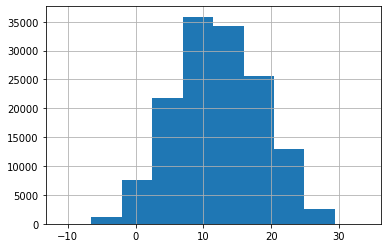

MaxTemp


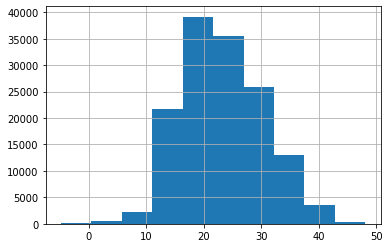

Rainfall


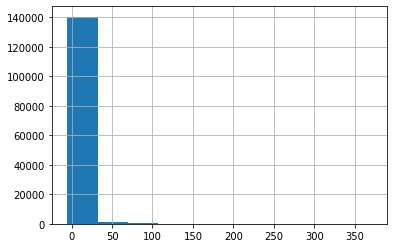

Evaporation


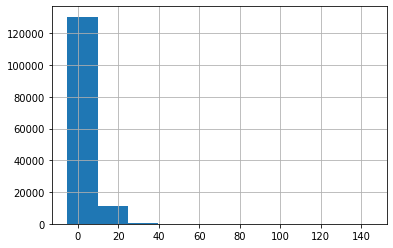

Sunshine


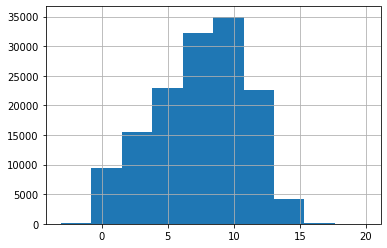

WindGustSpeed


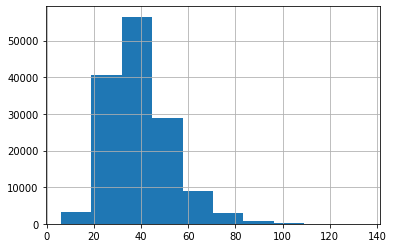

WindSpeed9am


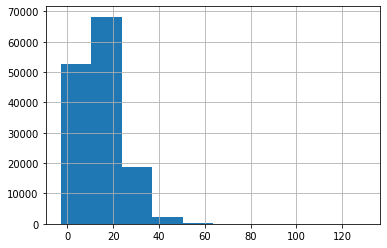

WindSpeed3pm


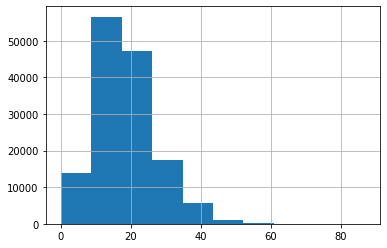

Humidity9am


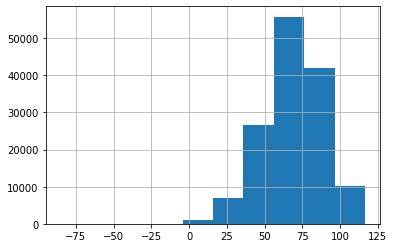

Humidity3pm


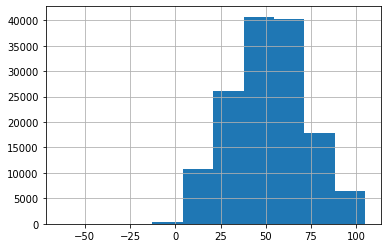

Pressure9am


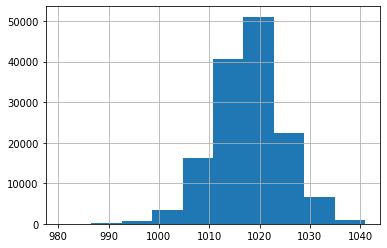

Pressure3pm


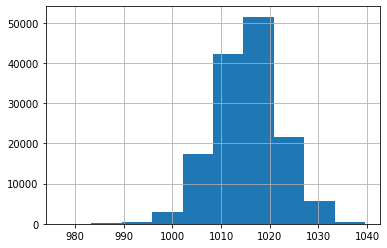

Cloud9am


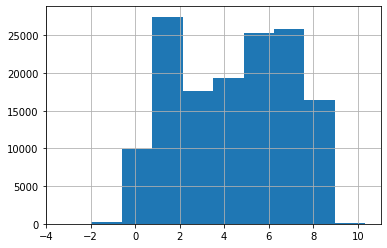

Cloud3pm


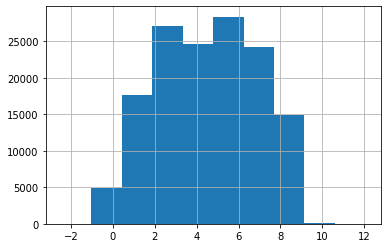

Temp9am


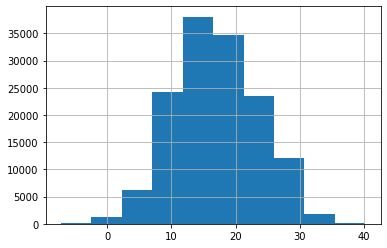

Temp3pm


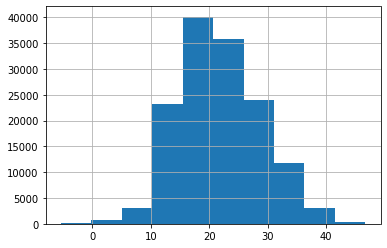

In [ ]:
for i, column in enumerate(imputed_data[numerical_features]):
    print(column)
    plt.figure(i)
    imputed_data[column].hist()
    plt.show()


### QQ Plot to verify likely distribution of numerical values

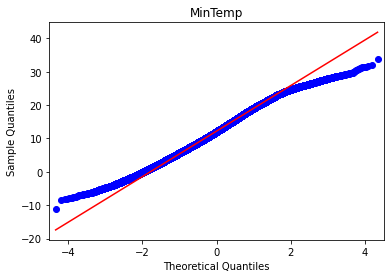

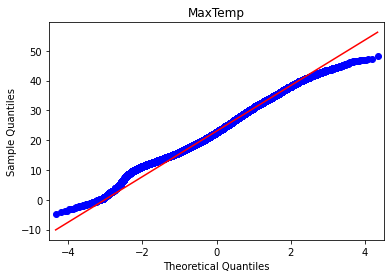

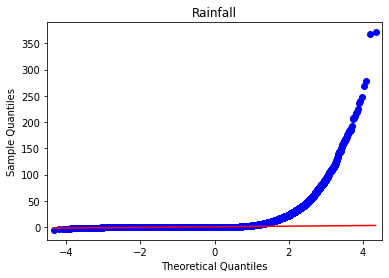

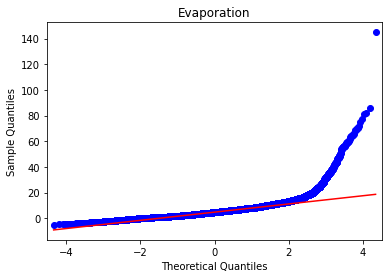

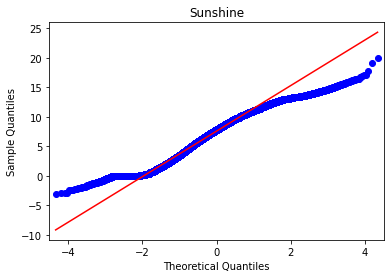

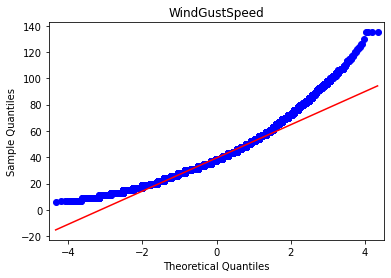

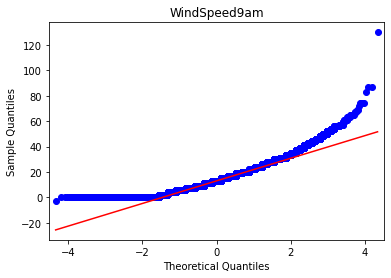

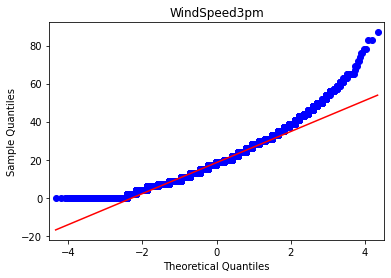

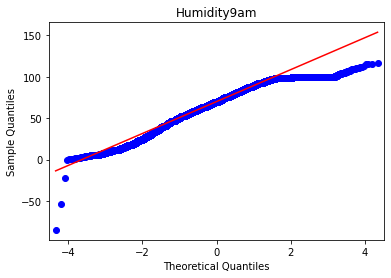

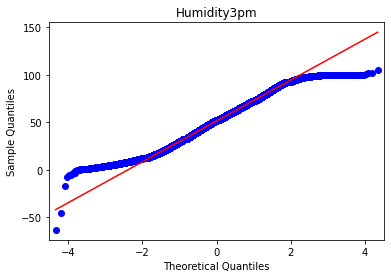

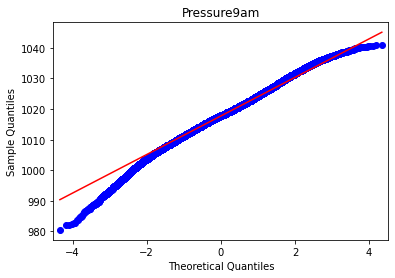

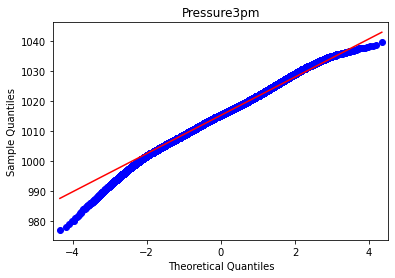

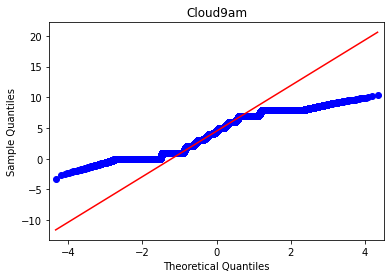

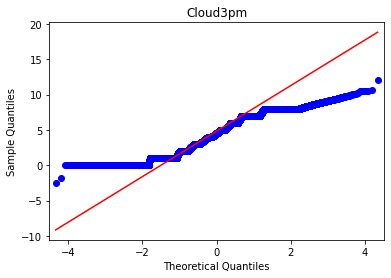

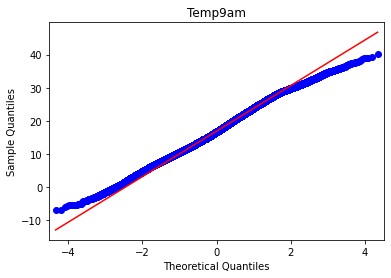

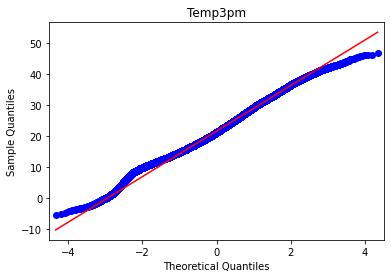

In [ ]:
import statsmodels.api as sm
from scipy.stats import norm
import pylab

for column in imputed_data[numerical_features]:
    sm.qqplot(imputed_data[column], line='q')
    pylab.title(column)
    pylab.show()

Bimodal Distributions - Sunshine, Cloud9am, Cloud3pm


Normal Distribution with Skewness - MinTemp, MaxTemp, WindGustSpeed, Humidity9am, Humidity93pm, Pressure9am, Pressure3pm, Temp9am, Temp3pm


Exponential Distributino - Rainfall, Evaporation, WindSpeed9am, WindSpeed3pm


### What are the likely distributions of the categorical variables?

In [ ]:
for column in imputed_data[categorical_features]:
  # Calculate the frequency of each category
  freq = imputed_data[column].value_counts()
  print(column)
  # Print the frequency of each category
  print(freq)
  print("")

Year
9.0     17508
7.0     17400
8.0     17231
2.0     16595
3.0     16419
6.0     16097
4.0     15126
5.0     15044
10.0     8466
1.0      2246
0.0        61
Name: Year, dtype: int64

Month
4.0     13055
2.0     13036
0.0     12921
5.0     12389
9.0     11804
6.0     11779
7.0     11762
10.0    11461
8.0     11345
3.0     11306
11.0    10810
1.0     10525
Name: Month, dtype: int64

Day
0.0     4688
14.0    4688
15.0    4687
12.0    4686
1.0     4686
5.0     4684
21.0    4684
2.0     4683
11.0    4682
6.0     4680
20.0    4677
13.0    4677
18.0    4676
19.0    4675
3.0     4674
22.0    4672
8.0     4672
16.0    4671
7.0     4671
10.0    4668
4.0     4667
23.0    4666
24.0    4665
17.0    4665
9.0     4664
25.0    4637
27.0    4630
26.0    4627
28.0    4374
29.0    4280
30.0    2737
Name: Day, dtype: int64

Location
9.0     3418
37.0    3337
31.0    3193
13.0    3192
15.0    3188
7.0     3161
0.0     3090
6.0     3034
39.0    3033
3.0     3031
22.0    3030
17.0    3028
5.0     3028
1.0 

Normalizing categorical features

In [ ]:
# we normalize the categorical features to better understand their proprtions
normalized_data = imputed_data.copy()
for column in normalized_data[categorical_features]:
  freq = normalized_data[column].value_counts(normalize=True)
  print(column)
  print(freq)
  print("")

Year
9.0     0.123128
7.0     0.122369
8.0     0.121180
2.0     0.116708
3.0     0.115470
6.0     0.113205
4.0     0.106377
5.0     0.105800
10.0    0.059539
1.0     0.015795
0.0     0.000429
Name: Year, dtype: float64

Month
4.0     0.091812
2.0     0.091678
0.0     0.090869
5.0     0.087128
9.0     0.083014
6.0     0.082838
7.0     0.082719
10.0    0.080602
8.0     0.079786
3.0     0.079512
11.0    0.076023
1.0     0.074019
Name: Month, dtype: float64

Day
0.0     0.032969
14.0    0.032969
15.0    0.032962
12.0    0.032955
1.0     0.032955
5.0     0.032941
21.0    0.032941
2.0     0.032934
11.0    0.032927
6.0     0.032913
20.0    0.032892
13.0    0.032892
18.0    0.032885
19.0    0.032878
3.0     0.032871
22.0    0.032857
8.0     0.032857
16.0    0.032850
7.0     0.032850
10.0    0.032829
4.0     0.032822
23.0    0.032815
24.0    0.032808
17.0    0.032808
9.0     0.032800
25.0    0.032611
27.0    0.032561
26.0    0.032540
28.0    0.030761
29.0    0.030100
30.0    0.019248
Name: Day,

In [ ]:
normalized_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  float64
 1   MinTemp        142193 non-null  float64
 2   MaxTemp        142193 non-null  float64
 3   Rainfall       142193 non-null  float64
 4   Evaporation    142193 non-null  float64
 5   Sunshine       142193 non-null  float64
 6   WindGustDir    142193 non-null  float64
 7   WindGustSpeed  142193 non-null  float64
 8   WindDir9am     142193 non-null  float64
 9   WindDir3pm     142193 non-null  float64
 10  WindSpeed9am   142193 non-null  float64
 11  WindSpeed3pm   142193 non-null  float64
 12  Humidity9am    142193 non-null  float64
 13  Humidity3pm    142193 non-null  float64
 14  Pressure9am    142193 non-null  float64
 15  Pressure3pm    142193 non-null  float64
 16  Cloud9am       142193 non-null  float64
 17  Cloud3pm       142193 non-nul

Year


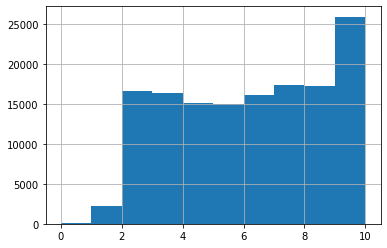

Month


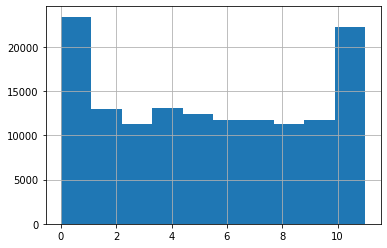

Day


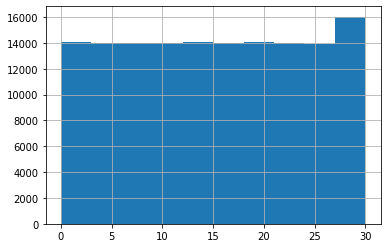

Location


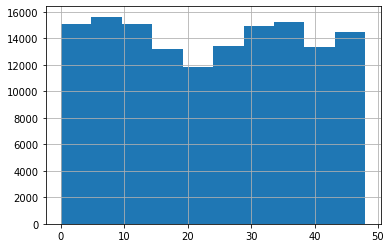

WindGustDir


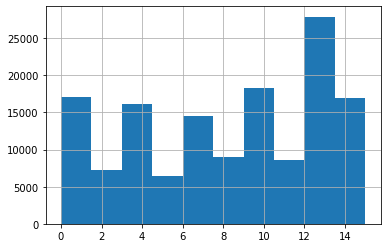

WindDir9am


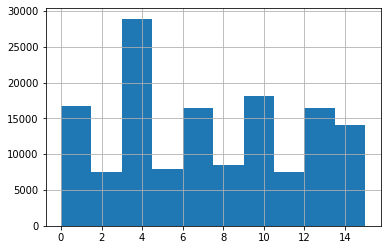

WindDir3pm


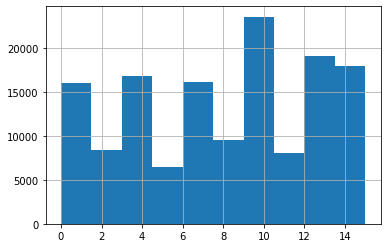

RainToday


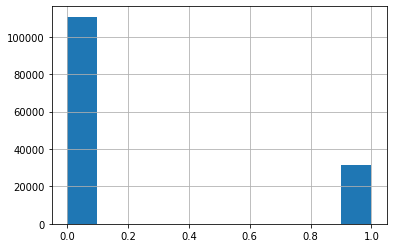

In [ ]:
for i, column in enumerate(normalized_data[categorical_features]):
    print(column)
    plt.figure(i)
    normalized_data[column].hist()
    plt.show()


### Checking balance of dependant variable

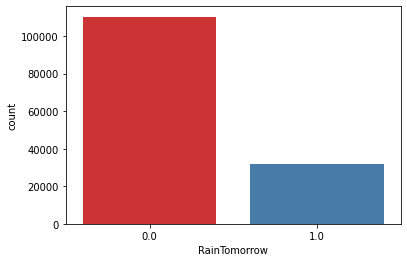

In [ ]:
sns.countplot(x='RainTomorrow', data = normalized_data, palette = "Set1")

Dependant variable is not balanced, we need to oversample RainTomorrow = Yes data

[Text(0.5, 1.0, 'RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')]

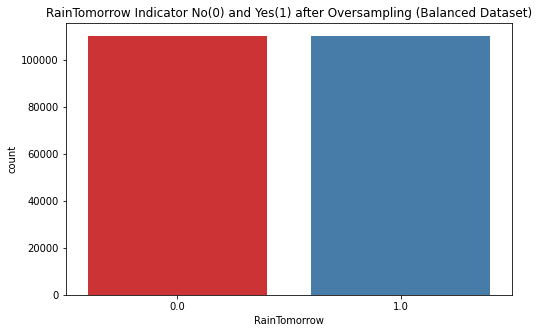

In [ ]:
from sklearn.utils import resample

no = normalized_data[normalized_data.RainTomorrow == 0]
yes = normalized_data[normalized_data.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled_data = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (8,5))
sns.countplot(x='RainTomorrow', data = oversampled_data, palette = "Set1").set(title='RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')


# Which independent variables are useful to predict a target (dependent variable)?

### Relationship of each categorical feature with target variable

['Year', 'Month', 'Day', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


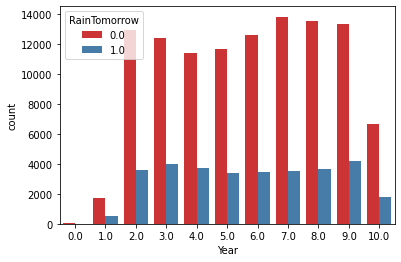

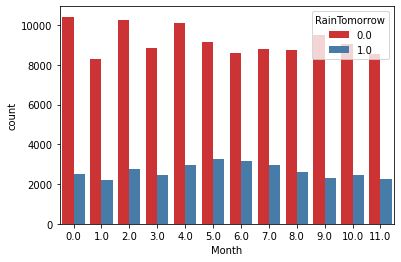

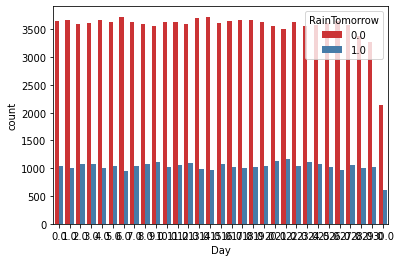

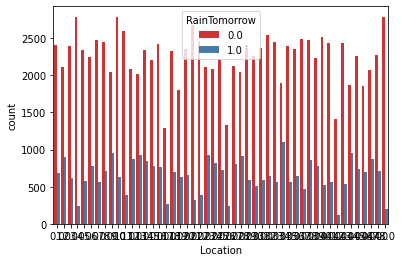

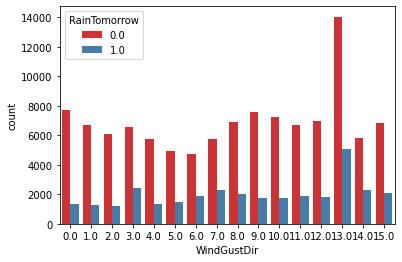

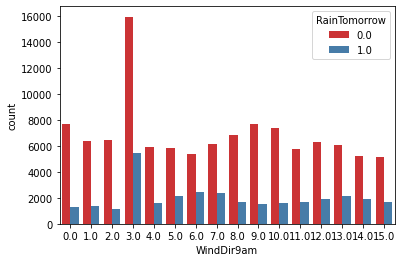

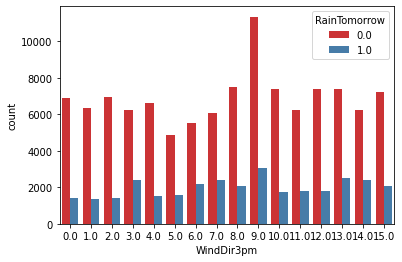

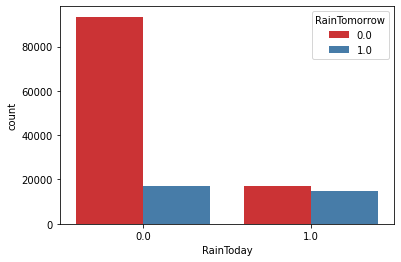

In [ ]:
print(categorical_features)

for f in categorical_features:
  sns.countplot(x=f, data = normalized_data, palette = "Set1", hue = "RainTomorrow")
  plt.show()

All of the variables seem to have an impact on the target variable and thus are not eliminated

### Check the range and outliers of the variable

In [ ]:
normalized_data[numerical_features].columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

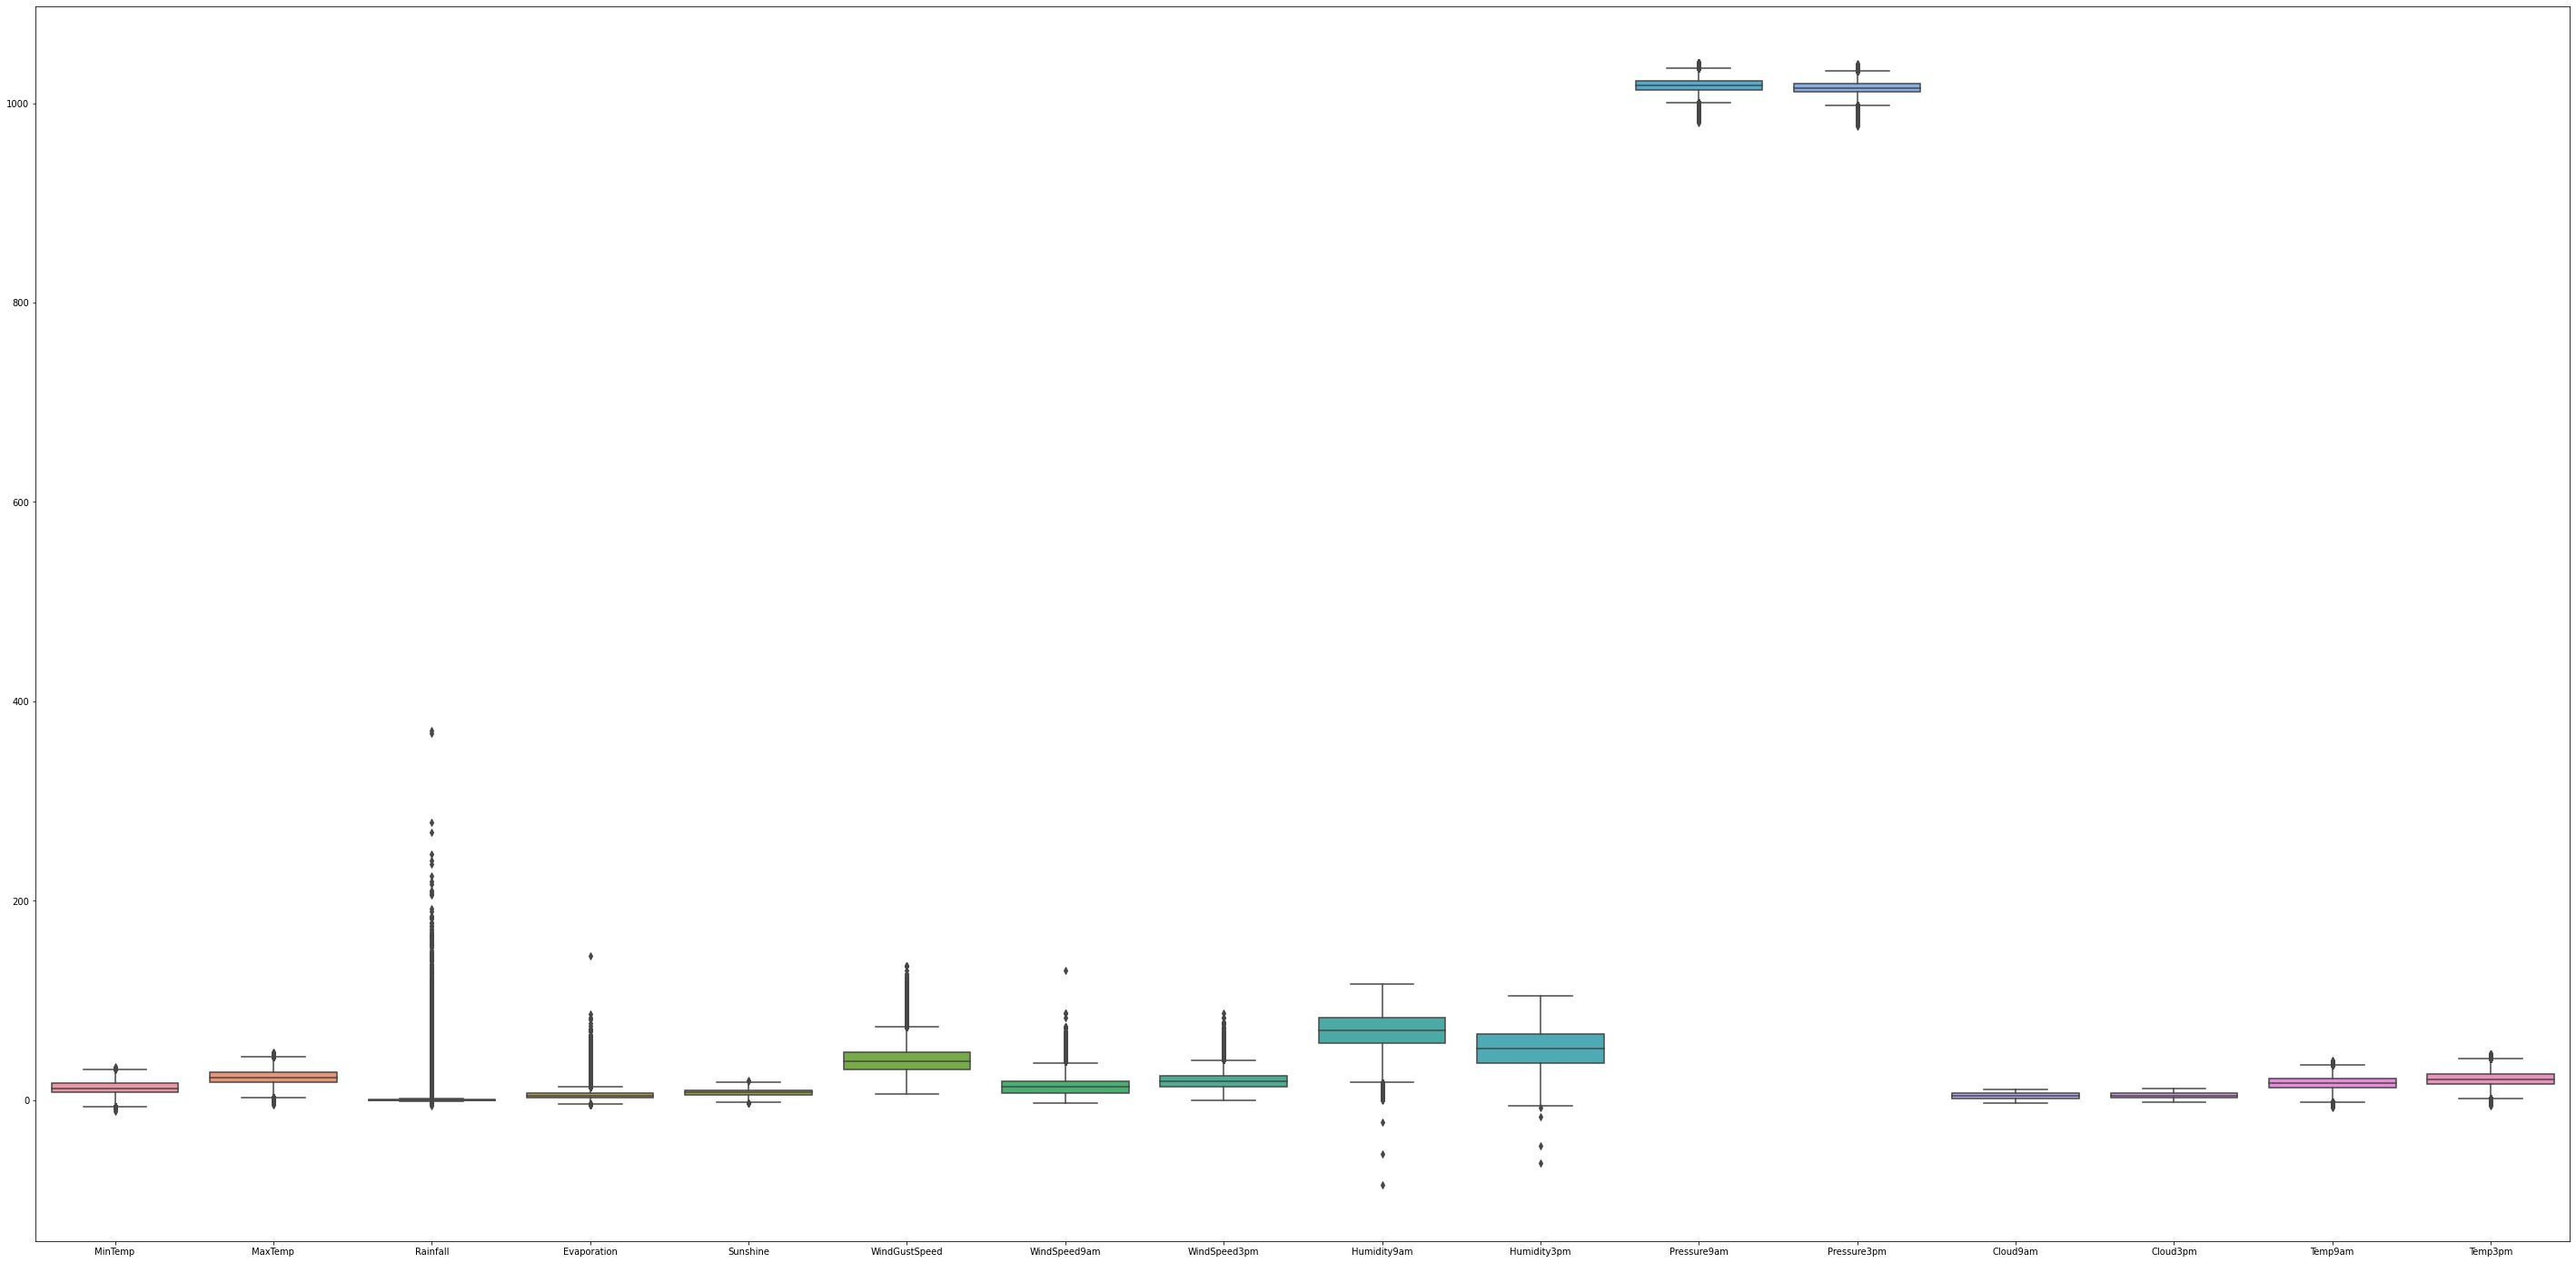

In [ ]:
#Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(50,25))
sns.boxplot(data=normalized_data[numerical_features])

In [ ]:
scaled_data = normalized_data.copy()

r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(scaled_data)
scaled_data = pd.DataFrame(r_scaler.transform(scaled_data), index=scaled_data.index, columns=scaled_data.columns)

In [ ]:
scaled_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  float64
 1   MinTemp        142193 non-null  float64
 2   MaxTemp        142193 non-null  float64
 3   Rainfall       142193 non-null  float64
 4   Evaporation    142193 non-null  float64
 5   Sunshine       142193 non-null  float64
 6   WindGustDir    142193 non-null  float64
 7   WindGustSpeed  142193 non-null  float64
 8   WindDir9am     142193 non-null  float64
 9   WindDir3pm     142193 non-null  float64
 10  WindSpeed9am   142193 non-null  float64
 11  WindSpeed3pm   142193 non-null  float64
 12  Humidity9am    142193 non-null  float64
 13  Humidity3pm    142193 non-null  float64
 14  Pressure9am    142193 non-null  float64
 15  Pressure3pm    142193 non-null  float64
 16  Cloud9am       142193 non-null  float64
 17  Cloud3pm       142193 non-nul

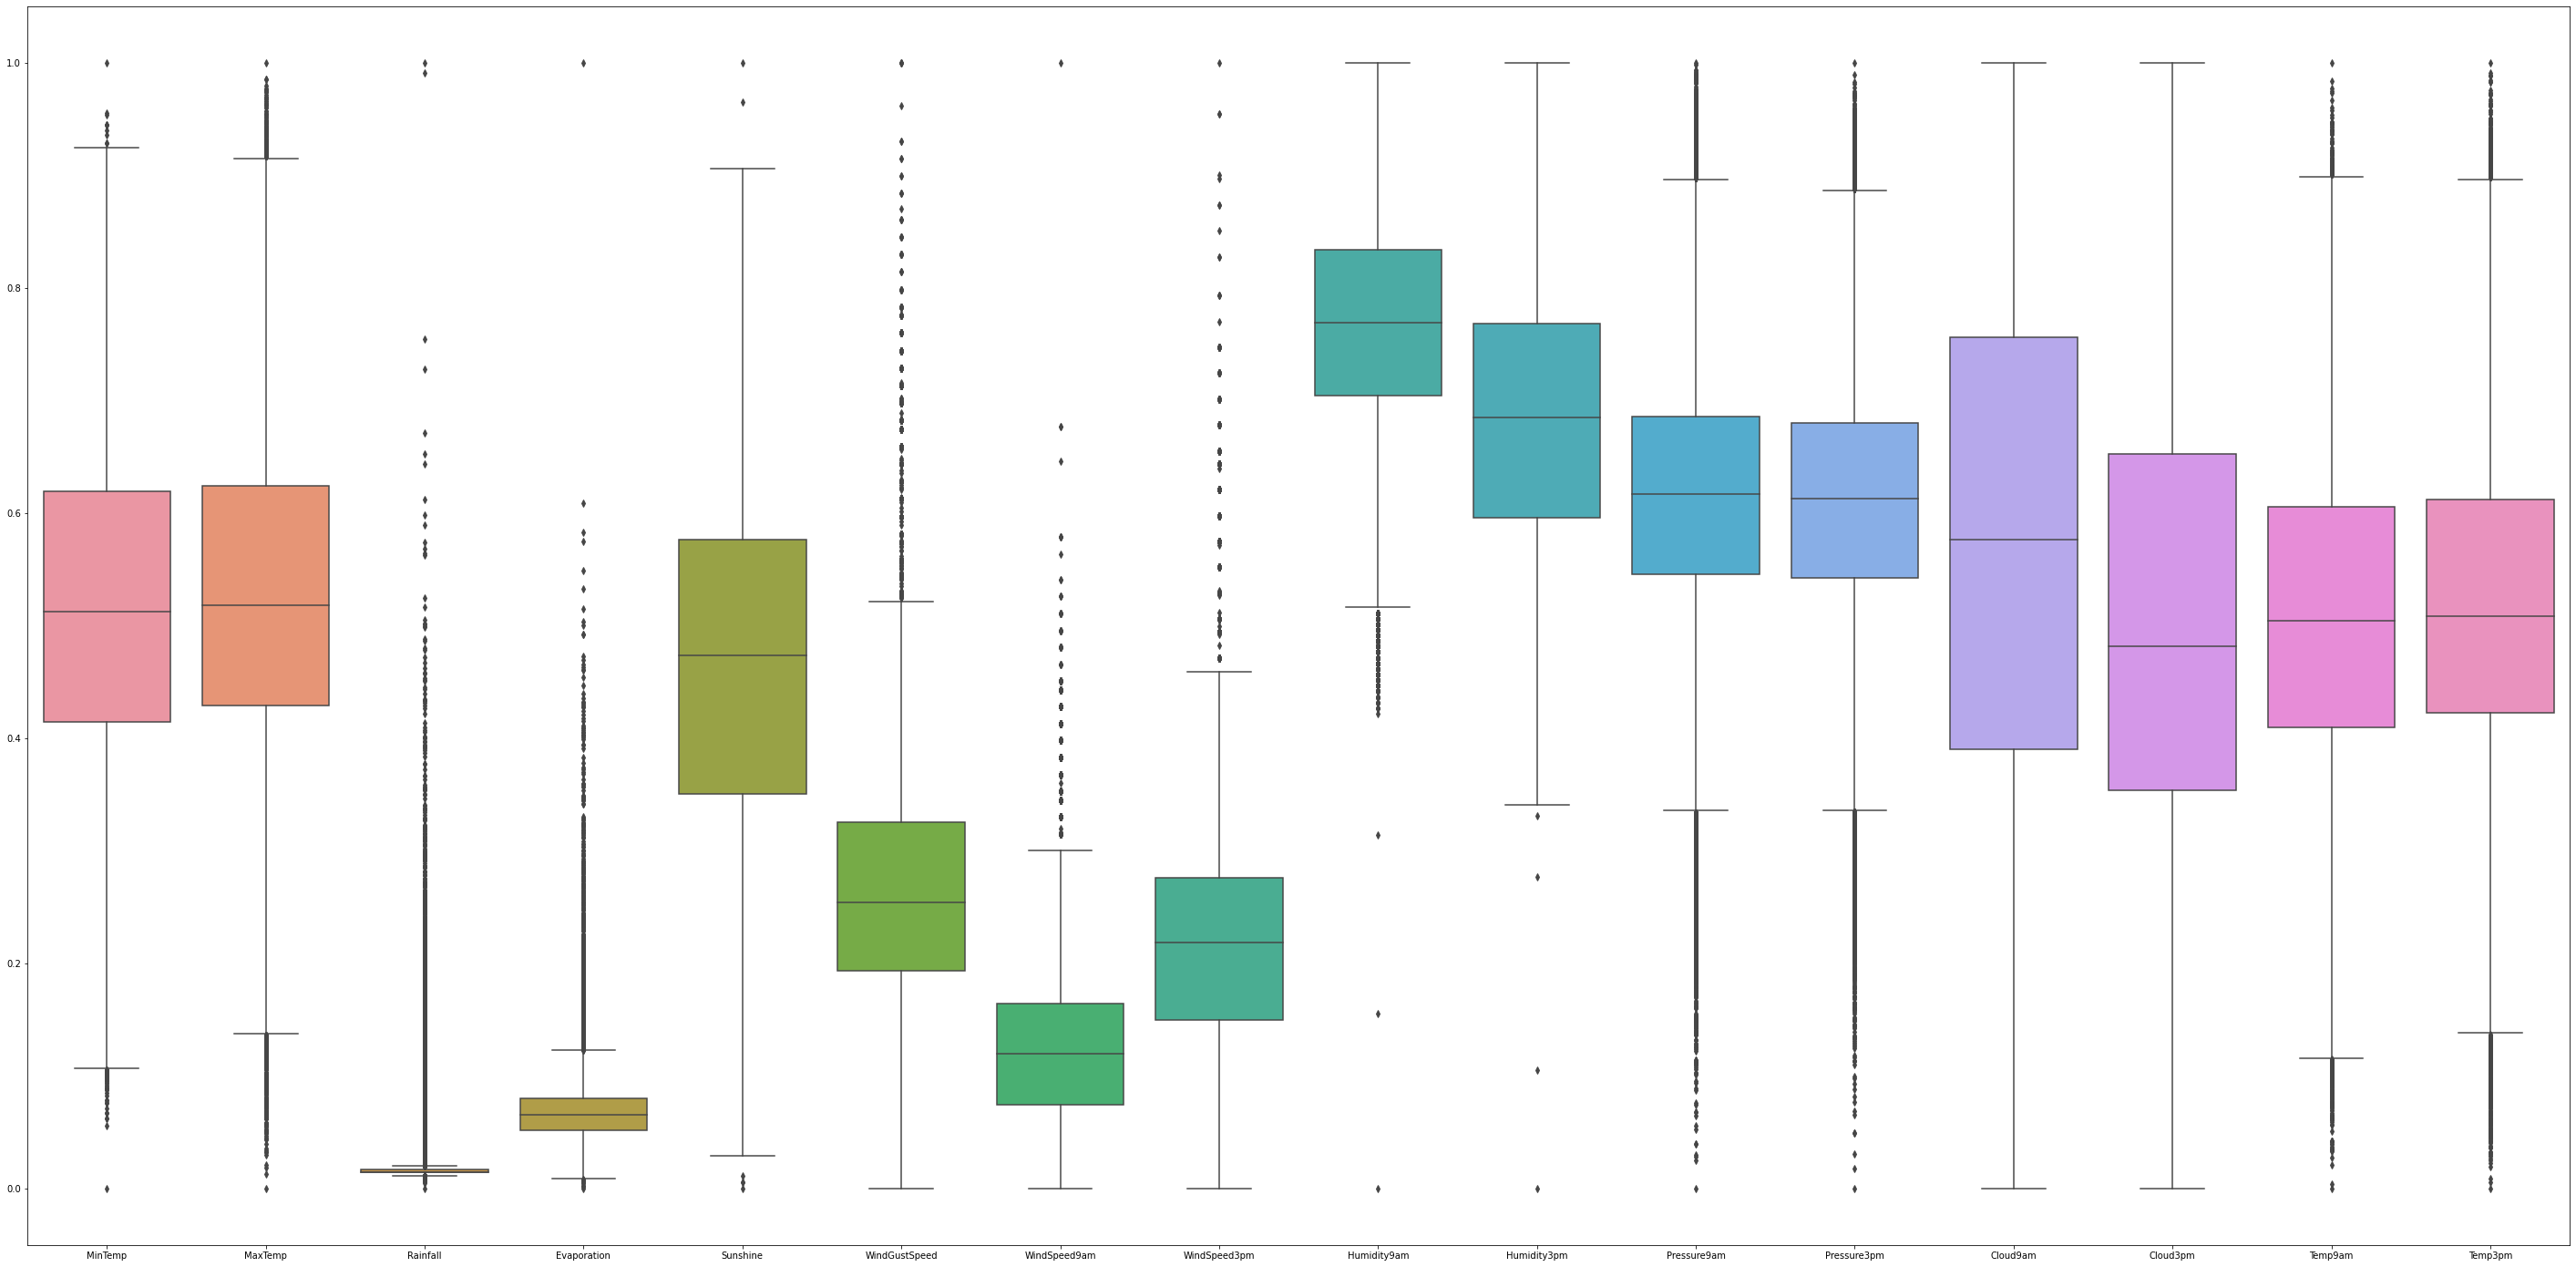

In [ ]:
plt.figure(figsize=(50,25))
sns.boxplot(data=scaled_data[numerical_features])


Rainfall, Evaporation, WindGustSpeed, WindSpeed9am, Windspeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm have substantial outliers

In [ ]:
outlier_features = ['Rainfall', 'Evaporation', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm','Pressure9am', 'Pressure3pm']
outlier_range = pd.DataFrame(columns = ["Feature", "Lowerbound", "Upperbound"])

for i,feature in enumerate(outlier_features):
    IQR = scaled_data[feature].quantile(0.75) - scaled_data[col].quantile(0.25)
    lower_bound = scaled_data[feature].quantile(0.25) - (IQR * 3)
    upper_bound = scaled_data[feature].quantile(0.75) + (IQR * 3)
    print(feature + "  outlier is < {lowerbound} and > {upperbound}".format(lowerbound=round(lower_bound,2), upperbound=round(upper_bound,2)))
    outlier_range.loc[i] = [feature, lower_bound, upper_bound]


Rainfall  outlier is < -0.04 and > 0.07
Evaporation  outlier is < -0.19 and > 0.32
WindGustSpeed  outlier is < -0.78 and > 1.3
WindSpeed9am  outlier is < -0.42 and > 0.66
WindSpeed3pm  outlier is < -0.68 and > 1.1
Humidity9am  outlier is < -1.8 and > 3.33
Humidity3pm  outlier is < -1.71 and > 3.07
Pressure9am  outlier is < -1.51 and > 2.74
Pressure3pm  outlier is < -1.5 and > 2.72


In [ ]:
outlier_range

,Feature,Lowerbound,Upperbound
0,Rainfall,-0.035940,0.067631
1,Evaporation,-0.189270,0.321161
2,WindGustSpeed,-0.782946,1.302326
3,WindSpeed9am,-0.419460,0.658286
4,WindSpeed3pm,-0.678161,1.103448
5,Humidity9am,-1.796110,3.334251
6,Humidity3pm,-1.708461,3.072149
7,Pressure9am,-1.512397,2.743802
8,Pressure3pm,-1.497600,2.720000


# We split data into test and train data



In [ ]:
X = scaled_data.drop("RainTomorrow", axis=1)
y = scaled_data["RainTomorrow"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
0,0.041667,0.543546,0.523629,0.016377,0.074789,0.460249,0.866667,0.294574,0.866667,0.933333,...,0.449587,0.4800,0.828973,0.516839,0.508439,0.522073,0.0,0.1,1.0,0.000000
1,0.041667,0.409950,0.565217,0.014783,0.074041,0.624385,0.933333,0.294574,0.400000,1.000000,...,0.497521,0.4912,0.386882,0.350588,0.514768,0.570058,0.0,0.1,1.0,0.033333
2,0.041667,0.532413,0.576560,0.014783,0.089515,0.663052,1.000000,0.310078,0.866667,1.000000,...,0.447934,0.5056,0.393625,0.308159,0.594937,0.548944,0.0,0.1,1.0,0.066667
3,0.041667,0.450029,0.620038,0.014783,0.076876,0.652139,0.266667,0.139535,0.600000,0.000000,...,0.613223,0.5712,0.326243,0.297931,0.533755,0.612284,0.0,0.1,1.0,0.100000
4,0.041667,0.634837,0.701323,0.017439,0.082383,0.410531,0.866667,0.271318,0.066667,0.466667,...,0.500826,0.4624,0.755829,0.721418,0.527426,0.673704,0.0,0.1,1.0,0.133333


### Verify if the features are independant by determining if they have low correlation coefficient for each other

Checking Correlation

In [ ]:
X.corr()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
Location,1.000000,-0.006225,-0.020575,-0.003585,0.084755,-0.007411,-0.005055,0.072332,-0.004434,0.008325,...,0.037884,0.046333,-0.021252,-0.015489,-0.015436,-0.023388,-0.004911,0.022265,-0.008375,-0.000004
MinTemp,-0.006225,1.000000,0.736727,0.104247,0.549504,0.105113,-0.136839,0.171240,-0.029109,-0.159394,...,-0.448629,-0.461745,0.086799,0.023336,0.902513,0.712215,0.055947,0.040013,-0.204353,0.001563
MaxTemp,-0.020575,0.736727,1.000000,-0.073620,0.676899,0.546196,-0.212316,0.064642,-0.212712,-0.181549,...,-0.329244,-0.429998,-0.340535,-0.334772,0.888175,0.984991,-0.226764,0.058555,-0.164786,-0.000515
Rainfall,-0.003585,0.104247,-0.073620,1.000000,-0.040490,-0.255398,0.044404,0.132442,0.085354,0.047610,...,-0.166838,-0.123118,0.226379,0.201079,0.010512,-0.077495,0.501122,-0.009167,-0.030957,0.001194
Evaporation,0.084755,0.549504,0.676899,-0.040490,1.000000,0.437333,-0.073864,0.241331,-0.078455,-0.047039,...,-0.305459,-0.330227,-0.256128,-0.258083,0.639962,0.655973,-0.197299,0.058016,-0.039762,-0.010032
Sunshine,-0.007411,0.105113,0.546196,-0.255398,0.437333,1.000000,-0.075815,-0.033285,-0.099419,-0.049747,...,0.020306,-0.050504,-0.757896,-0.787404,0.349021,0.568733,-0.360674,-0.005120,0.032747,-0.003474
WindGustDir,-0.005055,-0.136839,-0.212316,0.044404,-0.073864,-0.075815,1.000000,0.119065,0.356896,0.565814,...,-0.126588,-0.030681,0.078948,0.079694,-0.178200,-0.227763,0.127651,-0.021880,0.044115,-0.001470
WindGustSpeed,0.072332,0.171240,0.064642,0.132442,0.241331,-0.033285,0.119065,1.000000,0.083690,0.137242,...,-0.453784,-0.402139,0.082005,0.132044,0.143408,0.025442,0.153094,-0.028497,0.061513,-0.009614
WindDir9am,-0.004434,-0.029109,-0.212712,0.085354,-0.078455,-0.099419,0.356896,0.083690,1.000000,0.301298,...,-0.053647,0.045904,0.118266,0.083743,-0.114497,-0.219473,0.168410,-0.001550,0.026215,-0.005781
WindDir3pm,0.008325,-0.159394,-0.181549,0.047610,-0.047039,-0.049747,0.565814,0.137242,0.301298,1.000000,...,-0.138868,-0.033037,0.062322,0.072286,-0.176402,-0.195162,0.123130,-0.000677,0.035165,-0.000446


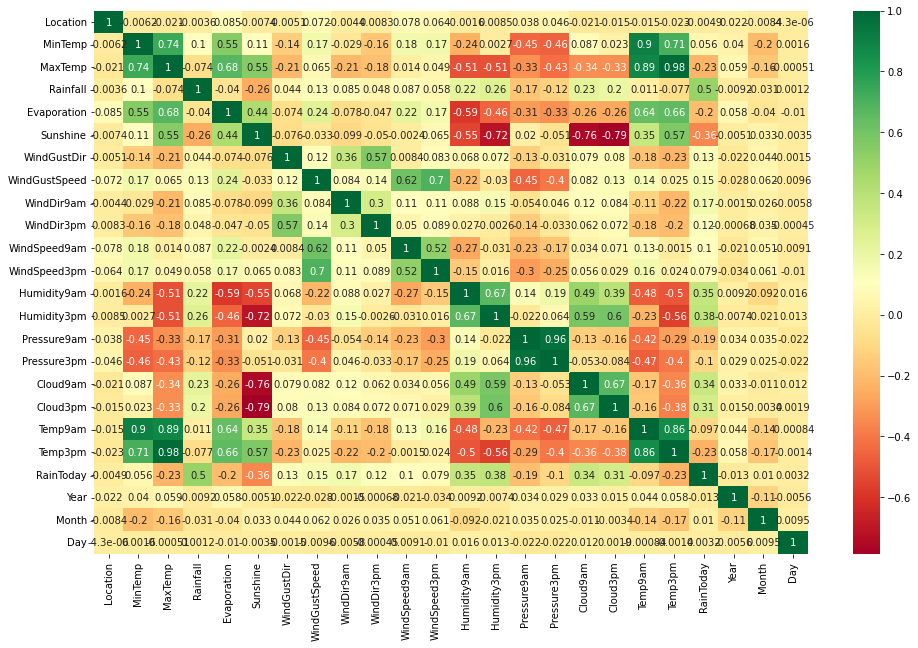

In [ ]:
#the heat map of the correlation
plt.figure(figsize=(16,10))
sns.heatmap(X.corr(), annot=True, cmap='RdYlGn')

*   MinTemp and MaxTemp have a positive correlation and are likely to be high if the other is high too.
*   Min Temp is also likely to be high if Temp9am is high, and also Temp3pm
*   Max Temp is also likely to be high if Temp9am is high, and also Temp3pm
*   MinTemp, MaxTemp are positively correlated Evaporation
*   MinTemp, MaxTemp are negatively correlated Pressure9am, Pressure3pm
*   MaxTemp is negatively correlated to Humidity9am, Humidity3pm
*   Sunshine is negatively correlated to Humidity9am, Humidity3pm
*   Pressure9am and Pressure3pm are negatively correlated to WindGustSpeed
*   Sunshine is negatively correlated to Cloud9am, Cloud3pm
*   Humidity9am, Humidity3pm is positively correlated to Cloud9am, Cloud3pm







In [ ]:
def correlation(df, threshold):

  col_corr = pd.DataFrame(columns = ['Feature1','Feature2','CorrelationCoefficient'])
  corr_matrix = df.corr()
  for i in range(0,len(corr_matrix.columns)):
    #print(abs(corr_matrix.iloc[i]))
    for j in range(i):
      curr = abs(corr_matrix.iloc[i,j])
      if curr > threshold:
        col_corr.loc[i] = [corr_matrix.columns[i],corr_matrix.columns[j], corr_matrix.iloc[i,j]]
        #col_corr.append(corr_matrix.columns[i])

  return col_corr


In [ ]:
col_corr = correlation(X,0.75)
print(col_corr)

       Feature1     Feature2  CorrelationCoefficient
15  Pressure3pm  Pressure9am                0.959996
16     Cloud9am     Sunshine               -0.757896
17     Cloud3pm     Sunshine               -0.787404
18      Temp9am      MaxTemp                0.888175
19      Temp3pm      Temp9am                0.863419


In [ ]:
correlated_set = list(col_corr['Feature1'])
correlated_set.extend(list(col_corr['Feature2']))
print(list(set(correlated_set)))

['Temp9am', 'Sunshine', 'MaxTemp', 'Cloud9am', 'Pressure9am', 'Pressure3pm', 'Temp3pm', 'Cloud3pm']


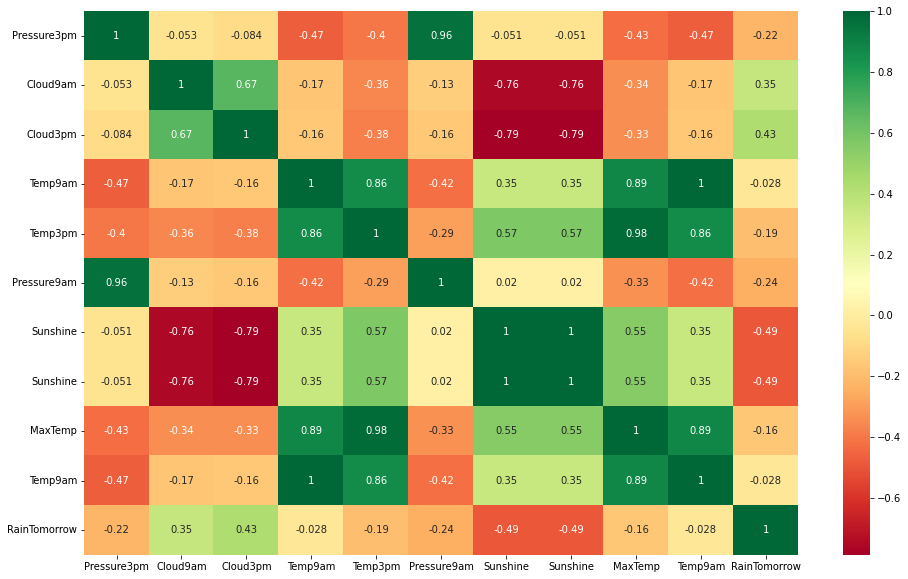

In [ ]:
#the heat map of the correlation
dependancy = correlated_set
dependancy.append('RainTomorrow')
plt.figure(figsize=(16,10))
sns.heatmap(scaled_data[dependancy].corr(), annot=True, cmap='RdYlGn')

We cannot safely remove Pressure3pm due to substantial correlation with target  

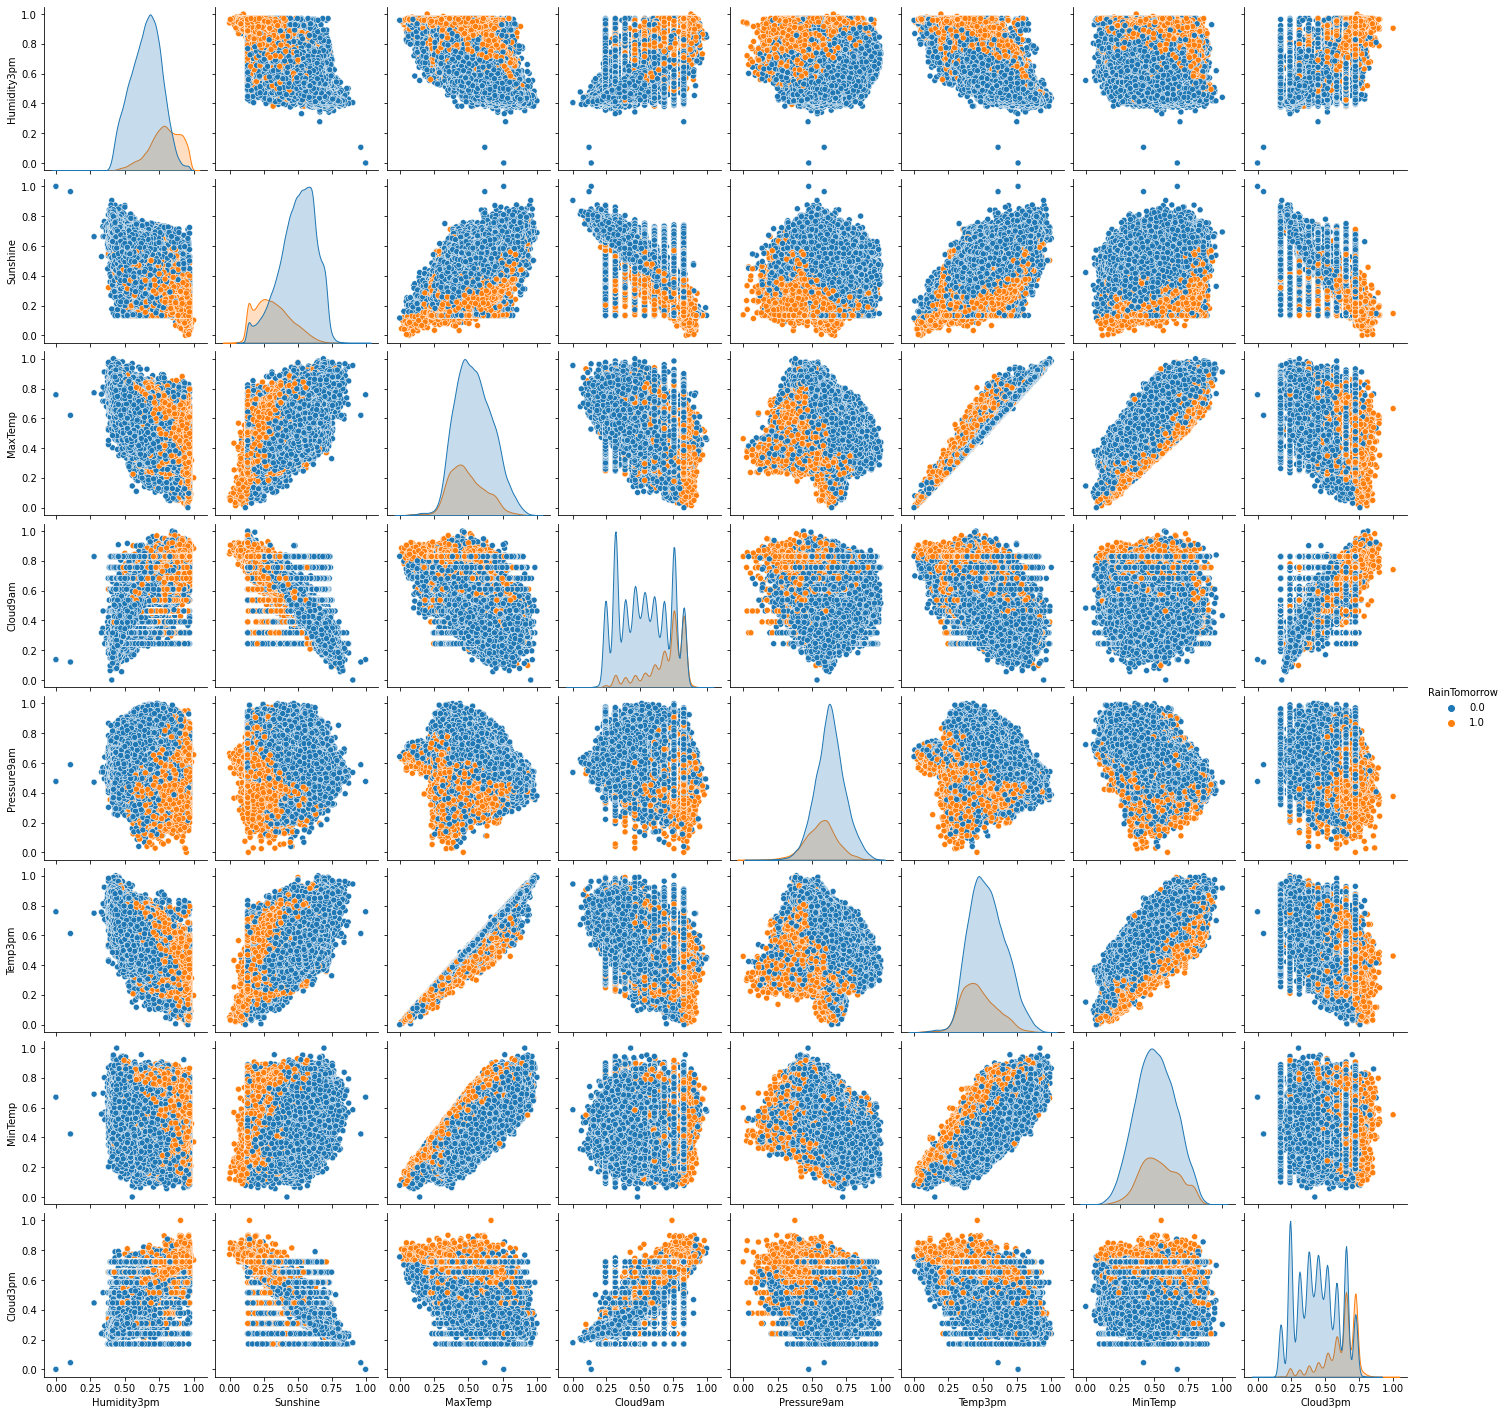

In [ ]:
sns.pairplot(data = scaled_data, vars = ('Humidity3pm', 'Sunshine', 'MaxTemp', 'Cloud9am', 'Pressure9am', 
       'Temp3pm', 'MinTemp', 'Cloud3pm'), hue='RainTomorrow' )
plt.show()


The pairplot shows some colinearity as well as scattered distribution

# Which predictor variables are the most important?

We will calculate feature importance for independant features

In [ ]:
X_new=X.reset_index()

In [ ]:
# Feature Importance using Filter Method (Chi-Square)
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
Kbest = X.columns[selector.get_support(indices=True)]

In [ ]:
print(Kbest)

Index(['Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainToday'],
      dtype='object')


In [ ]:
# Initializing Random Forest Classifier
RandForest_RFE = RandomForestClassifier() 
# Initializing the RFE object, one of the most important arguments is the estimator, in this case is RandomForest
rfe = RFE(estimator=RandForest_RFE, n_features_to_select=10, step=1)
# Fit the origial dataset
rfe = rfe.fit(X_train, y_train)

In [ ]:
print("Best features chosen by RFE: \n")

for i in X_train.columns[rfe.support_]:
    print(i)

Best features chosen by RFE: 

MinTemp
MaxTemp
Sunshine
WindGustSpeed
Humidity3pm
Pressure9am
Pressure3pm
Cloud9am
Cloud3pm
Temp3pm


In [ ]:
# Generating x_train and x_test based on the best features given by RFE

def prediction(X_train,X_test,y_train,y_test):

  X_train_RFE = rfe.transform(X_train)
  X_test_RFE = rfe.transform(X_test)
  RandForest_RFE = RandomForestClassifier()
  RandForest_RFE = RandForest_RFE.fit(X_train_RFE, y_train)

  # Making a prediction and calculting the accuracy
  y_pred = RandForest_RFE.predict(X_test_RFE)
  accuracy = accuracy_score(y_test, y_pred)
  print('Accuracy: ',accuracy)
  print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))

  # Print the Confusion Matrix and slice it into four pieces
  cm = confusion_matrix(y_test, y_pred)
  print('Confusion matrix\n\n', cm)
  print('True Positives(TP) = ', cm[0,0])
  print('True Negatives(TN) = ', cm[1,1])
  print('False Positives(FP) = ', cm[0,1])
  print('False Negatives(FN) = ', cm[1,0])

  # visualize confusion matrix with seaborn he[atmap
  cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                  index=['Predict Positive:1', 'Predict Negative:0'])
  sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')



  # print classification accuracy
  classification_accuracy = (cm[0,0] + cm[1,1]) / float(cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0])
  print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

  # print classification error
  classification_error = (cm[0,1] + cm[1,0]) / float(cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0])
  print('Classification error : {0:0.4f}'.format(classification_error))

Accuracy:  0.8820633636907064
Mean squared error: 0.12
Confusion matrix

 [[21149   918]
 [ 2436  3936]]
True Positives(TP) =  21149
True Negatives(TN) =  3936
False Positives(FP) =  918
False Negatives(FN) =  2436
Classification accuracy : 0.8821
Classification error : 0.1179


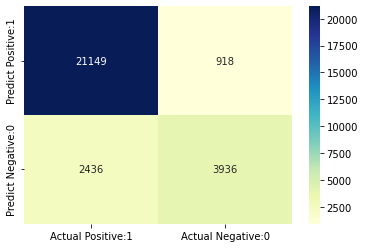

In [ ]:
prediction(X_train,X_test,y_train,y_test)


### Let train using Logistic Regression

In [ ]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)

# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([0., 0., 0., ..., 0., 0., 1.])

In [ ]:
# probability of getting output as 0 - no rain

logreg.predict_proba(X_test)[:,0]

array([0.86985719, 0.91941234, 0.83686116, ..., 0.98540808, 0.78564198,
       0.30577433])

In [ ]:
# probability of getting output as 1 - rain

logreg.predict_proba(X_test)[:,1]

array([0.13014281, 0.08058766, 0.16313884, ..., 0.01459192, 0.21435802,
       0.69422567])

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8576



# Remove outliers and keep outliers (does if have an effect of the final predictive model)?


In [ ]:
from datasist.structdata import detect_outliers


no_outlier_data = scaled_data.copy()


In [ ]:
print(len(no_outlier_data))

142193


In [ ]:
for i in range(len(outlier_range)):
  #col = outlier_range.loc[i, 'Feature']
  no_outlier_data = no_outlier_data[no_outlier_data[outlier_range.loc[i, 'Feature']] >= outlier_range.loc[i, 'Lowerbound']]
  no_outlier_data = no_outlier_data[no_outlier_data[outlier_range.loc[i, 'Feature']] <= outlier_range.loc[i, 'Upperbound']]

len(no_outlier_data)

138103

Accuracy:  0.8825531298649578
Mean squared error: 0.12
Confusion matrix

 [[20954   891]
 [ 2353  3423]]
True Positives(TP) =  20954
True Negatives(TN) =  3423
False Positives(FP) =  891
False Negatives(FN) =  2353
Classification accuracy : 0.8826
Classification error : 0.1174


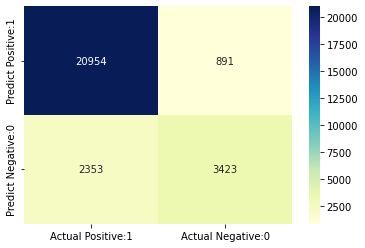

In [ ]:
X = no_outlier_data.drop("RainTomorrow", axis=1)
y = no_outlier_data["RainTomorrow"]

X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X, y, test_size=0.2, random_state=0)
prediction(X_red_train,X_red_test,y_red_train,y_red_test)

# Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

In [ ]:
# remove 1%
n=round(0.99*len(scaled_data))
reduced_data_1 = scaled_data.sample(n=n)

# remove 5%
n=round(0.95*len(scaled_data))
reduced_data_5 = scaled_data.sample(n=n)

# remove 10%
n=round(0.90*len(scaled_data))
reduced_data_10 = scaled_data.sample(n=n)

### Imputing missing data using MICE

In [ ]:
imputed_data_1 = reduced_data_1.copy(deep=True) 
mice_imputer = IterativeImputer()
imputed_data_1.iloc[:, :] = mice_imputer.fit_transform(reduced_data_1)

imputed_data_5 = reduced_data_5.copy(deep=True) 
imputed_data_5.iloc[:, :] = mice_imputer.fit_transform(reduced_data_5)

imputed_data_10 = reduced_data_10.copy(deep=True) 
imputed_data_10.iloc[:, :] = mice_imputer.fit_transform(reduced_data_10)

Accuracy:  0.8758657432072456
Mean squared error: 0.12
Confusion matrix

 [[20755   977]
 [ 2518  3905]]
True Positives(TP) =  20755
True Negatives(TN) =  3905
False Positives(FP) =  977
False Negatives(FN) =  2518
Classification accuracy : 0.8759
Classification error : 0.1241


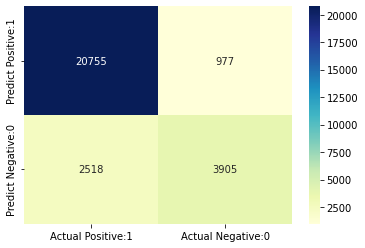

In [ ]:
X = imputed_data_1.drop("RainTomorrow", axis=1)
y = imputed_data_1["RainTomorrow"]

X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X, y, test_size=0.2, random_state=0)
prediction(X_red_train,X_red_test,y_red_train,y_red_test)

Accuracy:  0.8820002220823926
Mean squared error: 0.12
Confusion matrix

 [[20105   914]
 [ 2274  3724]]
True Positives(TP) =  20105
True Negatives(TN) =  3724
False Positives(FP) =  914
False Negatives(FN) =  2274
Classification accuracy : 0.8820
Classification error : 0.1180


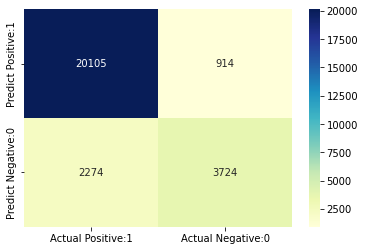

In [ ]:
X = imputed_data_5.drop("RainTomorrow", axis=1)
y = imputed_data_5["RainTomorrow"]

X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X, y, test_size=0.2, random_state=0)
prediction(X_red_train,X_red_test,y_red_train,y_red_test)

Accuracy:  0.8824379761672202
Mean squared error: 0.12
Confusion matrix

 [[19017   851]
 [ 2158  3569]]
True Positives(TP) =  19017
True Negatives(TN) =  3569
False Positives(FP) =  851
False Negatives(FN) =  2158
Classification accuracy : 0.8824
Classification error : 0.1176


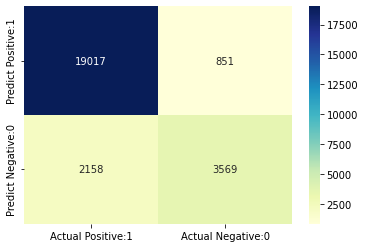

In [ ]:
X = imputed_data_10.drop("RainTomorrow", axis=1)
y = imputed_data_10["RainTomorrow"]

X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X, y, test_size=0.2, random_state=0)
prediction(X_red_train,X_red_test,y_red_train,y_red_test)

### Data imputation using Mode

In [ ]:
imputed_data_1 = reduced_data_1.copy(deep=True) 
for col in imputed_data_1.columns:
  imputed_data_1[col] = imputed_data_1[col].fillna(imputed_data_1[col].mode()[0])

imputed_data_5 = reduced_data_5.copy(deep=True) 
for col in imputed_data_5.columns:
  imputed_data_5[col] = imputed_data_5[col].fillna(imputed_data_5[col].mode()[0])

  
imputed_data_10 = reduced_data_10.copy(deep=True) 
for col in imputed_data_10.columns:
  imputed_data_10[col] = imputed_data_10[col].fillna(imputed_data_10[col].mode()[0])

Accuracy:  0.8760788492274907
Mean squared error: 0.12
Confusion matrix

 [[20726  1006]
 [ 2483  3940]]
True Positives(TP) =  20726
True Negatives(TN) =  3940
False Positives(FP) =  1006
False Negatives(FN) =  2483
Classification accuracy : 0.8761
Classification error : 0.1239


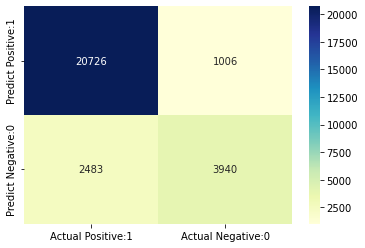

In [ ]:
X = imputed_data_1.drop("RainTomorrow", axis=1)
y = imputed_data_1["RainTomorrow"]

X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X, y, test_size=0.2, random_state=0)
prediction(X_red_train,X_red_test,y_red_train,y_red_test)

Accuracy:  0.8820372358144871
Mean squared error: 0.12
Confusion matrix

 [[20117   902]
 [ 2285  3713]]
True Positives(TP) =  20117
True Negatives(TN) =  3713
False Positives(FP) =  902
False Negatives(FN) =  2285
Classification accuracy : 0.8820
Classification error : 0.1180


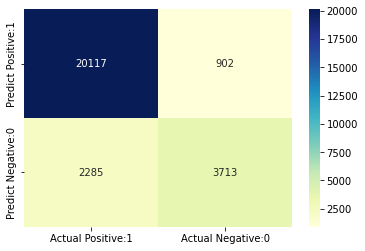

In [ ]:
X = imputed_data_5.drop("RainTomorrow", axis=1)
y = imputed_data_5["RainTomorrow"]

X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X, y, test_size=0.2, random_state=0)
prediction(X_red_train,X_red_test,y_red_train,y_red_test)

Accuracy:  0.8813440125024419
Mean squared error: 0.12
Confusion matrix

 [[19032   836]
 [ 2201  3526]]
True Positives(TP) =  19032
True Negatives(TN) =  3526
False Positives(FP) =  836
False Negatives(FN) =  2201
Classification accuracy : 0.8813
Classification error : 0.1187


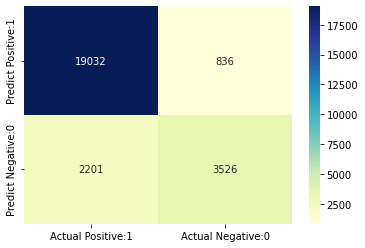

In [ ]:
X = imputed_data_10.drop("RainTomorrow", axis=1)
y = imputed_data_10["RainTomorrow"]

X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X, y, test_size=0.2, random_state=0)
prediction(X_red_train,X_red_test,y_red_train,y_red_test)

### Data imputation using Median

In [ ]:
imputed_data_1 = reduced_data_1.copy(deep=True) 
for col in imputed_data_1.columns:
  imputed_data_1[col] = imputed_data_1[col].fillna(imputed_data_1[col].median())

imputed_data_5 = reduced_data_5.copy(deep=True) 
for col in imputed_data_5.columns:
  imputed_data_5[col] = imputed_data_5[col].fillna(imputed_data_5[col].median())

  
imputed_data_10 = reduced_data_10.copy(deep=True) 
for col in imputed_data_10.columns:
  imputed_data_10[col] = imputed_data_10[col].fillna(imputed_data_10[col].median())

Accuracy:  0.8767536849582668
Mean squared error: 0.12
Confusion matrix

 [[20753   979]
 [ 2491  3932]]
True Positives(TP) =  20753
True Negatives(TN) =  3932
False Positives(FP) =  979
False Negatives(FN) =  2491
Classification accuracy : 0.8768
Classification error : 0.1232


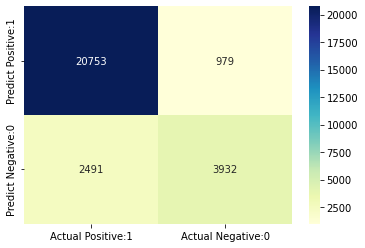

In [ ]:
X = imputed_data_1.drop("RainTomorrow", axis=1)
y = imputed_data_1["RainTomorrow"]

X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X, y, test_size=0.2, random_state=0)
prediction(X_red_train,X_red_test,y_red_train,y_red_test)

Accuracy:  0.8829625791168524
Mean squared error: 0.12
Confusion matrix

 [[20134   885]
 [ 2277  3721]]
True Positives(TP) =  20134
True Negatives(TN) =  3721
False Positives(FP) =  885
False Negatives(FN) =  2277
Classification accuracy : 0.8830
Classification error : 0.1170


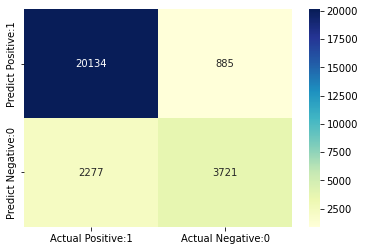

In [ ]:
X = imputed_data_5.drop("RainTomorrow", axis=1)
y = imputed_data_5["RainTomorrow"]

X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X, y, test_size=0.2, random_state=0)
prediction(X_red_train,X_red_test,y_red_train,y_red_test)

In [ ]:
X = imputed_data_10.drop("RainTomorrow", axis=1)
y = imputed_data_10["RainTomorrow"]

X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X, y, test_size=0.2, random_state=0)
prediction(X_red_train,X_red_test,y_red_train,y_red_test)

# Questions


*   Which independent variables are useful to predict a target (dependent variable)?

> As we learn from the comparison of each independant categorical variable with the target variable, all categorical variables show a significant impact on the target 


* Which independent variable have missing data? How much? 


> Sunshine, Evaporation, Cloud3pm, Cloud9am have between 37%-47% missing data. This data was imputed using the Multiple Imputation by Chained Equations method. Also the categorical features - WindGustDir,WindDir9am,WindDir3pm,RainToday were imputed using Mode of each column





* Do the training and test sets have the same data?


> No the data was randomly split into 80:20 ratio



* In the predictor variables independent of all the other predictor variables?



 > The predictor variables show multicolinearity and some have high correlation with other variables.



References: 



1.   YouTube/A_Crash_Course_in_Statistical_Learning - https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection/smokedetection.ipynb
2.   YouTube/A_Crash_Course_in_Statistical_Learning - https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection/ML_Data_Cleaning_and_Feature_Selection_Wine_Quality.ipynb
3.   Kaggle Tutorial - https://www.kaggle.com/code/prashant111/logistic-regression-classifier-tutorial#Logistic-Regression-Classifier-Tutorial-with-Python
4.   Logistic Regression SKLearn – Machine Learning example using Python – Part 1 -
https://www.youtube.com/watch?v=tODN7x3BO_E&t=1222s














Copyright 2021 AI Skunks

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.